# Analysis of Electricity Use from Sep 7, 2016 to Feb 3, 2019

## Inital Data input and analysis

In [50]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
# import data
e_data = pd.read_csv('electric_data_2016-09-07_to_2019-01-31.txt')

In [8]:
# basic info on the data, 21,049 entries
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21049 entries, 0 to 21048
Data columns (total 8 columns):
TYPE          21049 non-null object
DATE          21049 non-null object
START TIME    21049 non-null object
END TIME      21049 non-null object
USAGE         21049 non-null float64
UNITS         21049 non-null object
COST          21049 non-null object
NOTES         15 non-null object
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [9]:
#looking at the columns of the DataFrame
e_data.head(3)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-09-07,00:00,00:59,0.08,kWh,$0.01,NaN
1,Electric usage,2016-09-07,01:00,01:59,0.08,kWh,$0.01,NaN
2,Electric usage,2016-09-07,02:00,02:59,0.06,kWh,$0.01,NaN


In [10]:
#Create a column for datetime object, will be useful later
e_data['timeStamp'] = pd.to_datetime(e_data['DATE'] + ' ' + e_data['START TIME'])
e_data.head(3)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,timeStamp
0,Electric usage,2016-09-07,00:00,00:59,0.08,kWh,$0.01,NaN,2016-09-07 00:00:00
1,Electric usage,2016-09-07,01:00,01:59,0.08,kWh,$0.01,NaN,2016-09-07 01:00:00
2,Electric usage,2016-09-07,02:00,02:59,0.06,kWh,$0.01,NaN,2016-09-07 02:00:00


In [11]:
# Turn COST column from strings to floats
e_data['COST'] = e_data['COST'].apply(lambda cost: float(cost[1:]))
e_data.head(3)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,timeStamp
0,Electric usage,2016-09-07,00:00,00:59,0.08,kWh,0.01,NaN,2016-09-07 00:00:00
1,Electric usage,2016-09-07,01:00,01:59,0.08,kWh,0.01,NaN,2016-09-07 01:00:00
2,Electric usage,2016-09-07,02:00,02:59,0.06,kWh,0.01,NaN,2016-09-07 02:00:00


In [12]:
type(e_data['COST'].iloc[0])

numpy.float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1499a7f0>,
      dtype=object)

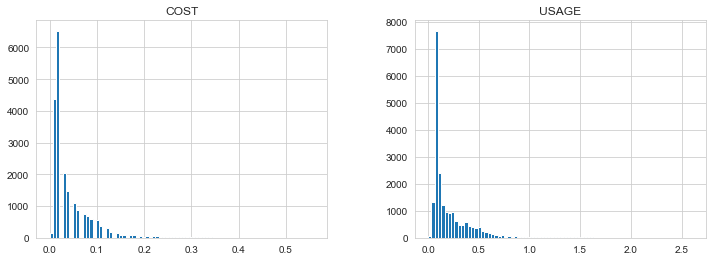

In [14]:
#distribution plot of hourly electricity use
e_data.hist(bins=80,figsize=(12,4))

In [15]:
# mean of hourly electricity use
print(e_data['USAGE'].mean())

0.22489952016722511


In [16]:
# max of hourly electricity use
e_data['USAGE'].max()

2.61

The max hourly usage of 2.61 is very large compared to the rest of the data. It is possible that there might have been something wrong with the smart meter. I am going to investigate a bit more to see if I can tell if the 2.61 is good data or not.

In [17]:
#Pull up information about max value
print(e_data[e_data['USAGE']==e_data['USAGE'].max()])
#Check the day of the week. 1 is Tuesday
print(e_data[e_data['USAGE']==e_data['USAGE'].max()].iloc[0]['timeStamp'].weekday())

                 TYPE        DATE START TIME END TIME  USAGE UNITS  COST  \
18474  Electric usage  2018-10-16      18:00    18:59   2.61   kWh  0.56   

      NOTES           timeStamp  
18474   NaN 2018-10-16 18:00:00  
1


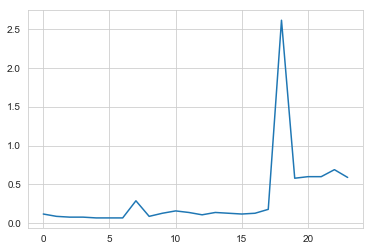

In [19]:
#plot energy use for the day with the peak hour
y = e_data[e_data['DATE']=='2018-10-16']['USAGE'].values
plt.plot(y)

This day appears normal. A peak in the morning (electricity for making breakfast and coffee) and then a peak later at night for cooking dinner (electric stove and oven) and then some energy use for the rest of the night (tv and computer use).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a146063c8>,
      dtype=object)

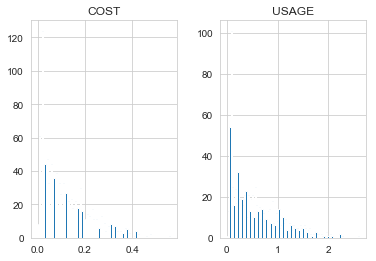

In [20]:
#Look at other 18:00 hours specifically to see if 2.61 is really such an outlier for this time
e_data[e_data['START TIME']=='18:00'].hist(bins=100)

2.61 is not drastically outside the range of other values. The next closest appears to be 2.3 or so. We must have just been doing a lot of cooking on 10-16-2018.

## Create a new DataFrame with the data shown by day

In [21]:
#set up new data frame with new columns
e_data_day = pd.DataFrame(columns = ['DATE', 'USAGE', 'COST', 'DAY OF WEEK'])
e_data_day.head(4)

,DATE,USAGE,COST,DAY OF WEEK


In [22]:
#combine data for each day
for i in e_data['DATE'].unique():
    var_cost = e_data[e_data['DATE']==i]['COST'].sum()
    var_usage = e_data[e_data['DATE'] == i]['USAGE'].sum()
    e_data_day = e_data_day.append({'DATE': pd.to_datetime(i), 'USAGE': var_usage, 'COST':var_cost}, ignore_index=True)

In [23]:
#use the datetime object to get the day of the week as a number (0-6)
e_data_day['DAY OF WEEK'] = e_data_day['DATE'].apply(lambda date: date.weekday())

In [24]:
#map the number value to the corresponding day of the week name
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
e_data_day['DAY OF WEEK'] = e_data_day['DAY OF WEEK'].map(dmap)

In [25]:
#total number of days
e_data_day['DATE'].nunique()

877

In [26]:
#look at minimum data usage
e_data_day['USAGE'].min()

0.0

In [27]:
#0 energy use for the whole day doesn't seem right. Let's look at that day specifically.
e_data_day[e_data_day['USAGE'] == 0]
#Looks like the smart meter wasn't working this day

,DATE,USAGE,COST,DAY OF WEEK
95,2016-12-11,0.0,0.0,Sun


In [273]:
# Check the hourly data around that date
e_data[(e_data['DATE']>'2016-12-09') & (e_data['DATE']<'2016-12-13')]

# Appears that the day before and the day after the meter was working properly. 

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,timeStamp
2257,Electric usage,2016-12-10,00:00,00:59,0.07,kWh,0.01,NaN,2016-12-10 00:00:00
2258,Electric usage,2016-12-10,01:00,01:59,0.08,kWh,0.01,NaN,2016-12-10 01:00:00
2259,Electric usage,2016-12-10,02:00,02:59,0.07,kWh,0.01,NaN,2016-12-10 02:00:00
2260,Electric usage,2016-12-10,03:00,03:59,0.06,kWh,0.01,NaN,2016-12-10 03:00:00
2261,Electric usage,2016-12-10,04:00,04:59,0.06,kWh,0.01,NaN,2016-12-10 04:00:00
2262,Electric usage,2016-12-10,05:00,05:59,0.08,kWh,0.01,NaN,2016-12-10 05:00:00
2263,Electric usage,2016-12-10,06:00,06:59,0.08,kWh,0.01,NaN,2016-12-10 06:00:00
2264,Electric usage,2016-12-10,07:00,07:59,0.08,kWh,0.01,NaN,2016-12-10 07:00:00
2265,Electric usage,2016-12-10,08:00,08:59,0.06,kWh,0.01,NaN,2016-12-10 08:00:00
2266,Electric usage,2016-12-10,09:00,09:59,0.06,kWh,0.01,NaN,2016-12-10 09:00:00


Going to remove data for that day.

In [28]:
e_data = e_data[e_data['DATE'] != '2016-12-11']
#check to make sure that day was removed
e_data[(e_data['DATE']>'2016-12-09') & (e_data['DATE']<'2016-12-13')]

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,timeStamp
2257,Electric usage,2016-12-10,00:00,00:59,0.07,kWh,0.01,NaN,2016-12-10 00:00:00
2258,Electric usage,2016-12-10,01:00,01:59,0.08,kWh,0.01,NaN,2016-12-10 01:00:00
2259,Electric usage,2016-12-10,02:00,02:59,0.07,kWh,0.01,NaN,2016-12-10 02:00:00
2260,Electric usage,2016-12-10,03:00,03:59,0.06,kWh,0.01,NaN,2016-12-10 03:00:00
2261,Electric usage,2016-12-10,04:00,04:59,0.06,kWh,0.01,NaN,2016-12-10 04:00:00
2262,Electric usage,2016-12-10,05:00,05:59,0.08,kWh,0.01,NaN,2016-12-10 05:00:00
2263,Electric usage,2016-12-10,06:00,06:59,0.08,kWh,0.01,NaN,2016-12-10 06:00:00
2264,Electric usage,2016-12-10,07:00,07:59,0.08,kWh,0.01,NaN,2016-12-10 07:00:00
2265,Electric usage,2016-12-10,08:00,08:59,0.06,kWh,0.01,NaN,2016-12-10 08:00:00
2266,Electric usage,2016-12-10,09:00,09:59,0.06,kWh,0.01,NaN,2016-12-10 09:00:00


In [29]:
e_data_day = e_data_day[e_data_day['DATE'] != '2016-12-11']
#check data
e_data_day[(e_data_day['DATE']>'2016-12-09') & (e_data_day['DATE']<'2016-12-13')]

,DATE,USAGE,COST,DAY OF WEEK
94,2016-12-10,2.72,0.30,Sat
96,2016-12-12,6.55,0.65,Mon


In [36]:
e_data_day['USAGE'].min()
# Minimum day now is 1.11 kWh which is fine

1.11

In [30]:
e_data_day.head(4)

,DATE,USAGE,COST,DAY OF WEEK
0,2016-09-07,5.58,0.85,Wed
1,2016-09-08,2.25,0.35,Thu
2,2016-09-09,2.39,0.38,Fri
3,2016-09-10,2.09,0.32,Sat


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


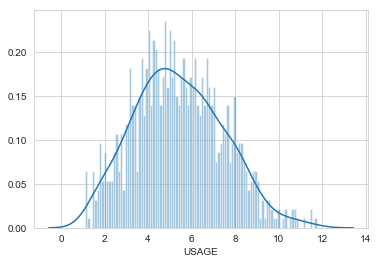

In [37]:
#Distribution plot of energy usage per day
sns.distplot(e_data_day['USAGE'],bins=100)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


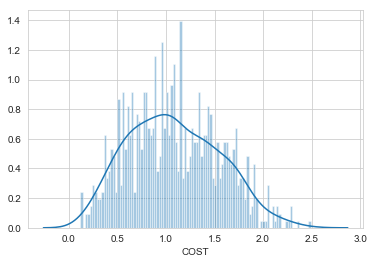

In [32]:
# distribution of cost per day
sns.distplot(e_data_day['COST'],bins=100)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


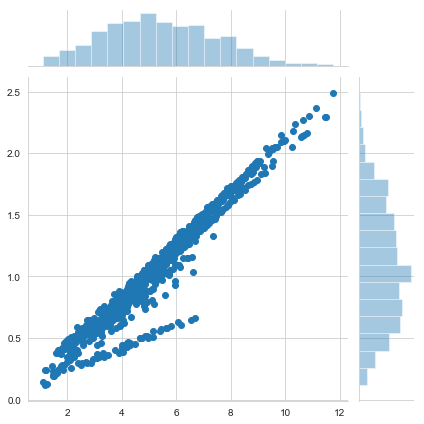

In [33]:
sns.jointplot(['USAGE'], ['COST'], e_data_day)
# The data is largely fixed between two different slopes. Likely there was a change in $ per kWh at some point.

In [88]:
# Attempt to determine the two different price/kWh rates, and the significance of the dates.
# Going to add a column to that shows the price/kWh rate for each day
from math import log10, floor
e_data_day['$/kWh'] = e_data_day['COST']/e_data_day['USAGE']
e_data_day.head(3)

,DATE,USAGE,COST,DAY OF WEEK,$/kWh
0,2016-09-07,5.58,0.85,Wed,0.152330
1,2016-09-08,2.25,0.35,Thu,0.155556
2,2016-09-09,2.39,0.38,Fri,0.158996


In [89]:
e_data_day['$/kWh'] = e_data_day['$/kWh'].apply(lambda ratio: round(ratio, 3-int(floor(log10(abs(ratio))))-1))
e_data_day.head(10)

,DATE,USAGE,COST,DAY OF WEEK,$/kWh
0,2016-09-07,5.58,0.85,Wed,0.152
1,2016-09-08,2.25,0.35,Thu,0.156
2,2016-09-09,2.39,0.38,Fri,0.159
3,2016-09-10,2.09,0.32,Sat,0.153
4,2016-09-11,5.12,0.81,Sun,0.158
5,2016-09-12,3.09,0.44,Mon,0.142
6,2016-09-13,4.04,0.65,Tue,0.161
7,2016-09-14,5.95,0.93,Wed,0.156
8,2016-09-15,4.84,0.74,Thu,0.153
9,2016-09-16,3.62,0.56,Fri,0.155


In [90]:
e_data_day['$/kWh'].mode()

0    0.213
dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


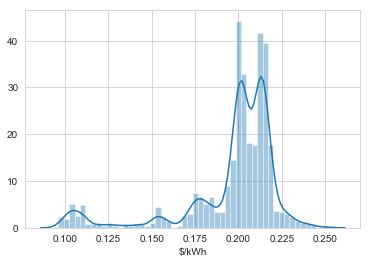

In [92]:
# Look at distribution of the $/kWh
sns.distplot(e_data_day['$/kWh'],bins=50)

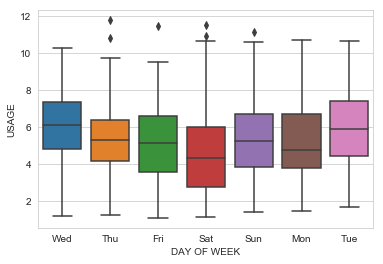

In [34]:
sns.boxplot(x='DAY OF WEEK', y='USAGE', data = e_data_day)

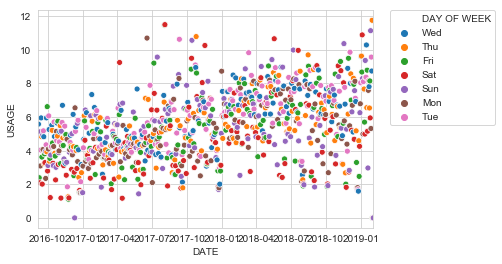

In [131]:
sns.scatterplot(x="DATE", y="USAGE", hue="DAY OF WEEK", data=e_data_day)
plt.xlim([e_data_day['DATE'].min(),  e_data_day['DATE'].max()])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

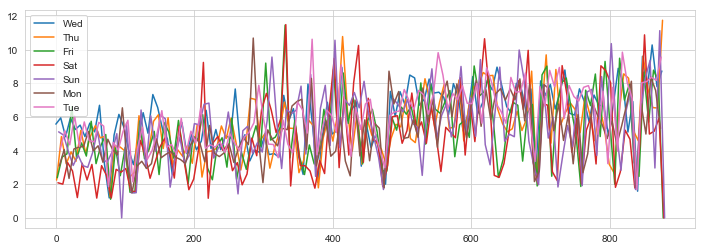

In [134]:
for day in e_data_day['DAY OF WEEK'].unique():
    e_data_day[e_data_day['DAY OF WEEK'] == day]['USAGE'].plot(figsize=(12,4),label=day)
plt.legend()